This notebook uses matrix-based entropy [1, 2, 3] to analyze the "mutual information plane" of pretrained LLMs. 

Authors: Oscar Skean

## The Matrix-based Entropy Quantity


Matrix-based entropy was first proposed in [1]. It is a quantity which serves as a tractable surrogate for traditional Shannon's entropy. It's calculated using a kernel $\kappa$ on a batch of samples drawn from a distribution, without making explicit assumptions on what the true distribution is. Before introducing matrix-based entropy, it would be helpful to introduce its traditional information theory analogue called Renyi entropy, given by:

\begin{equation}
\tag{Renyi Entropy}
H_{\alpha}({P}) = \frac{1}{1-\alpha}\log{\sum_{i-1}^n p_i^{\alpha}}
\end{equation}

The Renyi entropy is a family of entropies parameterized by $\alpha$. Notable special cases are $\alpha=0$ (max-entropy), $\displaystyle \lim_{\alpha \rightarrow 1}$ (Shannon entropy), and $\alpha=2$ (collision entropy). A good writeup of Renyi entropy and the usecases of different choices of $\alpha$ is given in [4].

The definition of matrix-based entropy is given as follows.
Given a infinitely divisible kernel $\kappa$, we first construct a Gram matrix $\mathbf{K}_{\mathbf{X}} \in \mathbb{R}^{\textrm{N} \times \textrm{N}}$ consisting of all pairwise evaluations of the $N$ points in $\mathbf{X}$. The choice of $\kappa$ can be fairly flexible and could be a Gaussian kernel, linear kernel, Laplacian kernel, etc. Given $\mathbf{K}_{\mathbf{X}}$, the matrix-based entropy of order $\alpha>0$ is defined as:
\begin{equation}
\tag{Matrix-based Entropy}
S_{\alpha}\left(\mathbf{K}_{\mathbf{X}}\right) = \frac{1}{1-\alpha}\log{\left[\textrm{tr}{\left( \left( \frac{\mathbf{K}_{\mathbf{X}}}{\textrm{tr}(\mathbf{K}_{\mathbf{X}})} \right)^{\alpha}\right) }\right]},
\end{equation}

 Raising a matrix to the power of an arbitary real-valued $\alpha$ is in general difficult, so using the fact that $tr(A) = \sum_{i=1}^n \lambda_i(A)$ we can equivalently compute the above as:

\begin{equation}
\tag{Matrix-based Entropy}
S_{\alpha}\left(\mathbf{K}_{\mathbf{X}}\right) = \frac{1}{1-\alpha}\log{\left[ \sum_{i=1}^N \frac{\lambda_i(\mathbf{K}_{\mathbf{X}})}{\textrm{tr}(\mathbf{K}_{\mathbf{X}})} \right]},
\end{equation}

Notice how the matrix $\mathbf{K}_{\mathbf{X}}$ is normalized before being raised to the $\alpha$ power. This is so that the eigenvalues of $\mathbf{K}_{\mathbf{X}}$ all sum to one (as per $tr(A) = \sum_{i=1}^n \lambda_i(A)$), which is a necessary condition to treat the eigenvalues as a probability distribution. The eigenvalues of $\mathbf{K}_{\mathbf{X}}$ signify the variance of datapoints in a particular principal component direction. Therefore Equation 3 is reminescent to the so called $logdet$ entropy which captures how much "volume" a dataset occupies. However, there are many hyperparameters involved in the logdet computation to improve stability and, in my experience, the above equation is much more stable.

Like Shannon's entropy, the matrix-based entropy acts as a building block for more complex quantites such as joint entropy and mutual information. The definitions for several important matrix-based quantities are given below. Note that $\kappa$ can be any infinitely divisible kernel or corresponding covariance matrix. The following definitions are rigously introduced in [1] and gently summarized in [2].

### Matrix-based joint entropy
In the following, the $\circ$ operation is the Hadamard product aka elementwise product.
\begin{equation}
\tag{Joint Entropy}
S_{\alpha}\left(\mathbf{K}_{\mathbf{X}}, \mathbf{K}_{\mathbf{Y}} \right) = S_{\alpha}(\mathbf{K}_\mathbf{X} \circ \mathbf{K}_\mathbf{Y})
\end{equation}

### Matrix-based conditional entropy

\begin{equation}
\tag{Conditional Entropy}
S_{\alpha}(\mathbf{K}_\mathbf{X} \vert \mathbf{K}_\mathbf{Y}) = S_{\alpha}(\mathbf{K}_\mathbf{X} \circ \mathbf{K}_\mathbf{Y}) - S_{\alpha}(\mathbf{K}_\mathbf{Y}). 
\end{equation}

### Matrix-based mutual information

\begin{equation}
\tag{Mutual Information}
I_{\alpha}(\mathbf{K}_\mathbf{X} ; \mathbf{K}_\mathbf{Y}) =  S_{\alpha}(\mathbf{K}_\mathbf{X}) - S_{\alpha}(\mathbf{K}_\mathbf{X} \vert \mathbf{K}_\mathbf{Y}) = S_{\alpha}(\mathbf{K}_\mathbf{X}) +  S_{\alpha}(\mathbf{K}_\mathbf{Y}) - S_{\alpha}(\mathbf{K}_\mathbf{X} \circ \mathbf{K}_\mathbf{Y}), 
\end{equation}

## Random Interesting Properties

1. If $\alpha=2$, you can avoid explicit eigendecomposition with the Frobenius norm $||A||_F^2 = \sum_{i} \sum_{j} A_{ij}^2 = \sum_i^n \lambda_i(A)^2$. The $O(n^3)$ eigendecomposition on the rhs is reduced to a $O(n^2)$ sum of matrix elements in the middle. This property was exploited in the field of self-supervised learning in [6].

2. It must be emphasized the matrix-based entropy is NOT necessarily an estimator of Shannon's entropy of the data. It is a different measure of entropy that satisfies the axioms of entropy proposed by Renyi. However, it has been shown that if $\kappa$ is a Gaussian kernel with bandwidth $\sigma$, then as batch size $N \rightarrow \infty$ and $\sigma \rightarrow 0$, then matrix-based entropy is equal to Shannon's entropy. Loosely speaking, this follows from Parzen density estimation principles where the kernel evaluation is equal to the probability of a sample under these limit conditions.

## References

1. Giraldo, Luis Gonzalo Sanchez, Murali Rao, and Jose C. Principe. "Measures of entropy from data using infinitely divisible kernels.
2. Skean, Oscar, et al. "Dime: Maximizing mutual information by a difference of matrix-based entropies. 
3. Bach, Francis. "Information theory with kernel methods."
4. https://en.wikipedia.org/wiki/R%C3%A9nyi_entropy
5. Wei, et al. "Large Language Model Evaluation via Matrix Entropy"
6. Skean, Oscar, et al. "FroSSL: Frobenius Norm Minimization for
Efficient Multiview Self-Supervised Learning"

# Entropy of Dataset

This section is a reproduction of Figure 1 in [5]. This paper uses $\alpha=1$, which is equivalent to the Shannon entropy of the normalized covariance eigenvalues. It references [2] and [3], though the special case of $\alpha=1$ was discussed even earlier in [1].

Some of the following dataloader/model code is adapted from https://github.com/waltonfuture/Matrix-Entropy

In [9]:
from transformers import AutoTokenizer, AutoModelForCausalLM, GPT2LMHeadModel, GPT2Model, AutoModel
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import repitl.matrix_itl as itl


device = "cuda:2"

In [13]:
import math

def normalize(R):
    """
    Normalize the input matrix by subtracting the mean and dividing by the L2 norm.
    From https://github.com/waltonfuture/Matrix-Entropy

    Args:
        R (torch.Tensor): Input matrix to be normalized.

    Returns:
        torch.Tensor: Normalized matrix.

    """
    with torch.no_grad():
        mean = R.mean(dim=0)
        R = R - mean
        norms = torch.norm(R, p=2, dim=1, keepdim=True)
        R = R / norms
    return R


def compute_entropies_for_each_sentence(model, dataloader, alpha=1):
    entropy_dict = {
        'unnormalized': [],
        'logN_normalized': [],
        'logD_normalized': [],
        'logNlogD_normalized': [],
        'lengths': []
    }
    
    with torch.no_grad():
        for batch in tqdm.tqdm(dataloader):
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            hidden_states = outputs.hidden_states
            N, D = hidden_states[0].shape[1:]

            last_hidden_state = normalize(outputs.last_hidden_state.squeeze())
            # (batch_size, num_words, embedding_dim)
            

            # be efficient here, XX^T and X^TX have the same eigenvalues and thus the same entropy
            if N > D:
                cov = last_hidden_state.T @ last_hidden_state
            else:
                cov = (last_hidden_state @ last_hidden_state.T)
            cov /= torch.trace(cov)
           
            entropy = itl.matrixAlphaEntropy(cov, alpha=alpha)
            entropy_dict['unnormalized'].append(entropy.item())
            entropy_dict['logN_normalized'].append(entropy.item() / math.log(N))
            entropy_dict['logD_normalized'].append(entropy.item() / math.log(D))
            entropy_dict['logNlogD_normalized'].append(entropy.item() / (math.log(N)*math.log(D)))
            entropy_dict['lengths'].append(N)

    return entropy_dict

Now we can compute the entropy of individual embedded sentences and get an estimate for the average entropy of a dataset

In [11]:
# load model

token = ...

model_path = "google/gemma-2b"
tokenizer = AutoTokenizer.from_pretrained(model_path, token=token)
model = AutoModel.from_pretrained(model_path, output_hidden_states=True, token=token).to(device)

/home/djaniak/mambaforge/envs/info/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]


In [ ]:
# # train set entropies
# dataloader = get_dataloader(tokenizer, "wikitext", split="train", num_samples=25000)
# train_entropies = compute_entropies_for_each_sentence(model, dataloader, alpha=1)

## Reproduce matrix entropy for paper:
# Transformers need glasses! Information over-squashing in language tasks

Entropy of ones (1), repeated several times, with 0 at the end.

In [14]:
import random

special_word = "1" 
lengths = list(range(2, 500, 10))
entropies = []

entropy_dict = {
        'unnormalized': [],
        'logN_normalized': [],
        'logD_normalized': [],
        'logNlogD_normalized': [],
        'lengths': []
    }

for length in lengths:
    input_string = ' '.join([special_word] * length) + ' 0'

    tokenized_string= tokenizer(input_string, truncation=False, return_tensors='pt')
    tokenized_string = {k: v.to(device) for k, v in tokenized_string.items()}

    with torch.no_grad():
        outputs = model(**tokenized_string)
        hidden_states = outputs.hidden_states
        N, D = hidden_states[0].shape[1:]

        last_hidden_state = normalize(outputs.last_hidden_state.squeeze())
        if N > D:
            cov = last_hidden_state.T @ last_hidden_state
        else:
            cov = (last_hidden_state @ last_hidden_state.T)
        cov /= torch.trace(cov)
        entropy = itl.matrixAlphaEntropy(cov, alpha=1)

        entropy_dict['unnormalized'].append(entropy.item())
        entropy_dict['logN_normalized'].append(entropy.item() / math.log(N))
        entropy_dict['logD_normalized'].append(entropy.item() / math.log(D))
        entropy_dict['logNlogD_normalized'].append(entropy.item() / (math.log(N)*math.log(D)))
        entropy_dict['lengths'].append(N)

Text(0.5, 0.98, "Entropy Behavior of Repeating '1'")

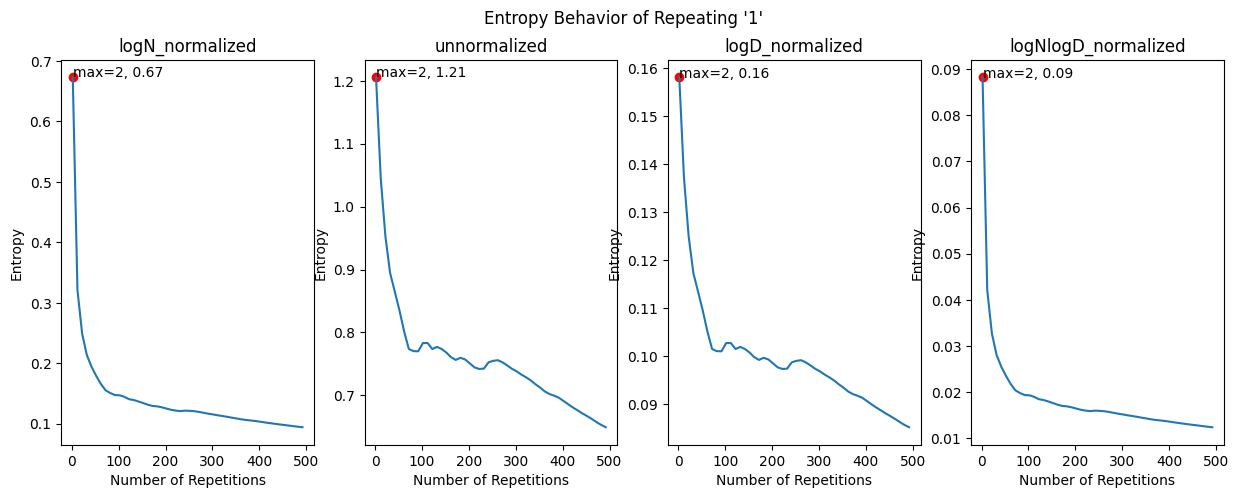

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
keys = ['logN_normalized', 'unnormalized', 'logD_normalized', 'logNlogD_normalized']
for ax, key in zip(axes.flatten(), keys):
    ax.plot(lengths, entropy_dict[key])
    ax.set_title(key)
    ax.set_xlabel("Number of Repetitions")
    ax.set_ylabel("Entropy")

    # show max point
    max_index = np.argmax(entropy_dict[key])
    ax.scatter(lengths[max_index], entropy_dict[key][max_index], color='red')
    ax.annotate(f"max={max_index+2}, {entropy_dict[key][max_index]:.2f}", (lengths[max_index], entropy_dict[key][max_index]))

fig.suptitle(f"Entropy Behavior of Repeating '{special_word}'")


# Is there an eigenvector that encodes repetition?

In [17]:
import numpy as np

special_words = ["1"]
lengths = list(range(10, 500, 10))
entropies = []

repeated_eigenvals_over_time = np.zeros((len(special_words), D, len(lengths)))

with torch.no_grad():
    for word_idx, word in enumerate(special_words):
        for i, length in tqdm.tqdm(enumerate(lengths), total=len(lengths)):
            input_string = ' '.join([word] * length) + ' 0'
            tokenized_string= tokenizer(input_string, truncation=False, return_tensors='pt')
            tokenized_string = {k: v.to(device) for k, v in tokenized_string.items()}


            outputs = model(**tokenized_string)
            hidden_states = outputs.hidden_states
            N, D = hidden_states[0].shape[1:]

            last_hidden_state = normalize(outputs.last_hidden_state.squeeze())

            cov = (last_hidden_state.T @ last_hidden_state)
            cov /= torch.trace(cov)

            # get eigs and vecs of cov
            eigs, vecs = torch.linalg.eigh(cov)
            eigs, indices = torch.sort(eigs, descending=True)
            vecs = vecs[:, indices].T

            for vec_idx, vec in enumerate(vecs):
                # rayleigh quotient
                repeated_eigenvals_over_time[word_idx][vec_idx][i] = (vec.T @ cov @ vec) / (vec.T @ vec)

  0%|          | 0/49 [00:00<?, ?it/s]

/tmp/ipykernel_1964101/311688354.py:33: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3675.)
  repeated_eigenvals_over_time[word_idx][vec_idx][i] = (vec.T @ cov @ vec) / (vec.T @ vec)
100%|██████████| 49/49 [00:16<00:00,  2.89it/s]


Now we take the top 5 eigenvectors and see how they evolve for our repeated sentences and our dataset sentences as length increases.

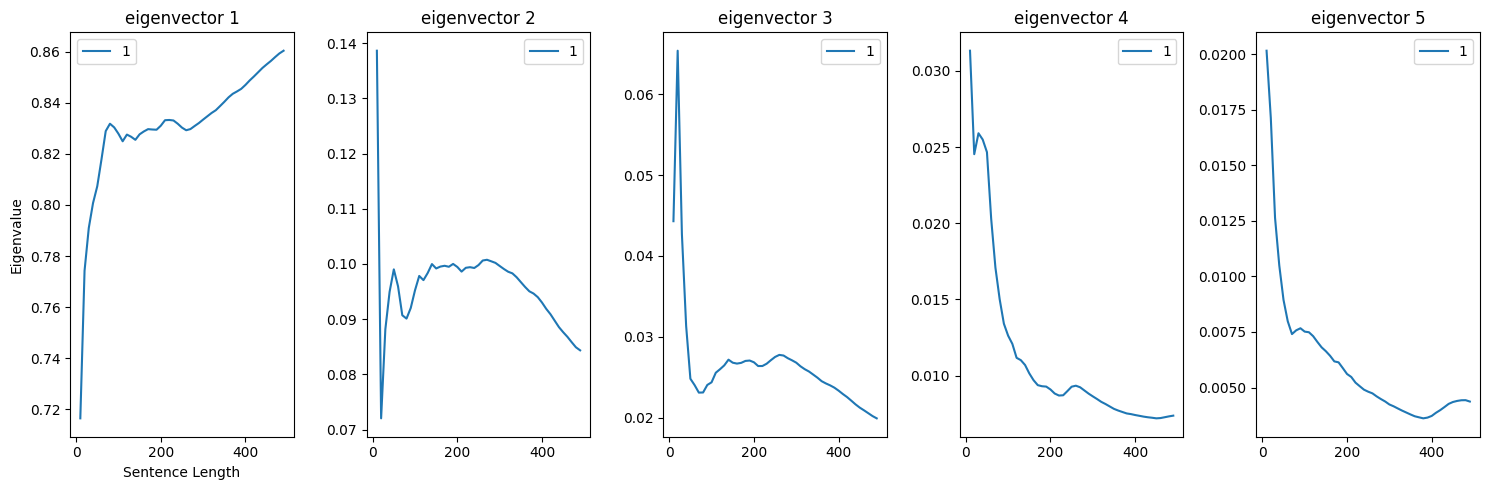

In [18]:
eig_idx_min, eig_idx_max = 0, 5

fig, axes = plt.subplots(1, eig_idx_max-eig_idx_min, figsize=(15, 5))

for vec_idx in range(eig_idx_min, eig_idx_max):
    for word_idx, word in enumerate(special_words):
        axes[vec_idx-eig_idx_min].plot(lengths, repeated_eigenvals_over_time[word_idx][vec_idx], label=word)
    axes[vec_idx-eig_idx_min].legend()
    axes[vec_idx-eig_idx_min].set_title(f"eigenvector {vec_idx+1}")

    # all_average_entropies = [np.mean(x) for x in all_vals]
    # axes[1].scatter(lengths, all_average_entropies)

axes[0].set_xlabel("Sentence Length")
axes[0].set_ylabel("Eigenvalue")

plt.tight_layout()
plt.show()